In [43]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
stock = 'ITC.NS'
data = yf.download(stock,'2010-01-01','2023-05-19')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,84.333336,85.000000,83.449997,84.550003,61.363998,5161635
2010-01-05,84.933334,85.583336,84.233330,85.383331,61.968807,10767225
2010-01-06,86.233330,86.233330,84.533333,85.583336,62.113983,7529979
2010-01-07,85.666664,86.166664,84.566666,85.316666,61.920433,4987434
2010-01-08,85.116669,86.166664,85.116669,85.500000,62.053490,4881351


In [45]:
price = data['Close']
price

Date
2010-01-04     84.550003
2010-01-05     85.383331
2010-01-06     85.583336
2010-01-07     85.316666
2010-01-08     85.500000
                 ...    
2023-05-12    420.450012
2023-05-15    427.799988
2023-05-16    423.950012
2023-05-17    427.600006
2023-05-18    419.700012
Name: Close, Length: 3301, dtype: float64

<Axes: xlabel='Date'>

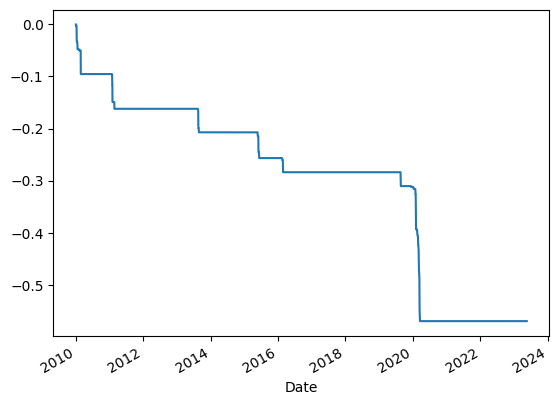

In [46]:
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()

In [47]:
print(f"Maximum Drawdown for the given period is: {mdd[-1]*100} %")


Maximum Drawdown for the given period is: -57.007299270073 %


In [48]:
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        ,  0.00985604,  0.00234243, ..., -0.00899948,
        0.00860949, -0.0184752 ])

In [49]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([1.        , 1.00985604, 1.01222156, ..., 5.01419275, 5.0573624 ,
       4.96392664])

In [50]:
print(f"Cumulative return of stock is {cumulative_ret[-1]*100}%")

Cumulative return of stock is 496.39266358170016%


In [51]:
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31    0.152591
2012-12-31    0.424739
2013-12-31    0.122211
2014-12-31    0.145565
2015-12-31   -0.110930
2016-12-31    0.105781
2017-12-31    0.089386
2018-12-31    0.069896
2019-12-31   -0.156045
2020-12-31   -0.120740
2021-12-31    0.043301
2022-12-31    0.520523
2023-12-31    0.265873
Freq: A-DEC, Name: Close, dtype: float64

In [52]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28   -0.071557
2010-03-31    0.132616
2010-04-30    0.010644
2010-05-31    0.065262
                ...   
2023-01-31    0.062736
2023-02-28    0.069107
2023-03-31    0.018051
2023-04-30    0.109648
2023-05-31   -0.013747
Freq: M, Name: Close, Length: 161, dtype: float64

In [53]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is : {avg_yearly_return*100}%")

Average yearly return is : 11.939604473285502%


In [54]:
sharpe_ratio = (avg_yearly_return - 0.07)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 8.210943218185253


In [55]:
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-02-28   -0.071557
2010-10-31   -0.039821
2011-01-31   -0.068995
2011-08-31   -0.040077
2011-09-30   -0.010000
                ...   
2021-12-31   -0.014018
2022-02-28   -0.019755
2022-11-30   -0.024950
2022-12-31   -0.024853
2023-05-31   -0.013747
Name: Close, Length: 68, dtype: float64

In [56]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.07)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 13.406692114310925
